In [3]:
import ipdb
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pylab as pylab
import cartopy
from utils import constants as cnst
from eod import msg
from utils import u_grid, u_interpolate as u_int, constants as cnst, u_arrays, u_darrays, u_met, u_statistics, u_plot
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as feature
import cartopy.io.shapereader as shapereader
import pandas as pd
import pickle as pkl
from utils import constants as cnst, u_statistics as ustats, u_plot


coast = shapereader.natural_earth(resolution='110m',
                                  category='physical',
                                  name='coastline')

countries = shapereader.natural_earth(resolution='110m',
                                      category='cultural',
                                      name='admin_0_countries')

pylab.rcParams['figure.figsize'] = (50., 50.)
%matplotlib inline

In [1]:
cd ..

/home/ck/pythonWorkspace/proj_CEH


In [14]:
old = pd.read_csv('/home/ck/DIR/cornkle/figs/LSTA/corrected_LSTA/new/ERA5/core_txt/cores_gt15000km2_table_AMSRE_LSTA_tracking_2hOverlap_17.csv', na_values=[-999,-99])
new = pd.read_csv('/home/ck/DIR/cornkle/figs/LSTA/corrected_LSTA/new/ERA5/core_txt/cores_gt15000km2_table_AMSRE_LSTA_tracking_new_2hOverlap_17.csv', na_values=[-999,-99])


In [15]:
test = new[np.isfinite(new['SMmean0'])]
test.shape

(9532, 24)

In [20]:
outpath = '/home/ck/DIR/cornkle/figs/LSTA/corrected_LSTA/new/ERA5/core_txt/totrack/'
for h in [15,16,17,18,19,20,21,22,23,0,1,2,3,4,5,6,7]:
    new = pd.read_csv('/home/ck/DIR/cornkle/figs/LSTA/corrected_LSTA/new/ERA5/core_txt/cores_gt15000km2_table_AMSRE_LSTA_tracking_new_2hOverlap_'+str(h)+'.csv', na_values=[-999,-99])
    out = new[np.isfinite(new['SMmean0'])]
    out = out.drop(columns=['id'])
    
    out.to_csv(outpath + "cores_gt15000km2_table_AMSRE_tracking_SM0finite_" + str(h) + ".csv", na_rep=-999, index_label='id') #

In [22]:
test = pd.read_csv('/home/ck/DIR/cornkle/figs/LSTA/corrected_LSTA/new/ERA5/core_txt/totrack/cores_gt15000km2_table_AMSRE_tracking_SM0finite_17.csv', na_values=[-999,-99])

In [23]:
test.shape

(9532, 24)

In [64]:
msgopen.shape

(7519, 24)

In [65]:
msgopen = msgopen[msgopen['initTime']<90]

In [66]:
print('Number of ALL cases:', msgopen.shape[0])

Number of ALL cases: 5390


In [67]:
np.unique(msgopen['initTime'][np.isfinite(msgopen['initTime'])])

array([ 2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,  5.5,  6. ,  6.5,  7. ,
        7.5,  8. ,  8.5,  9. ,  9.5, 10. , 10.5, 11. , 11.5, 12. , 12.5,
       13. , 13.5, 14. , 14.5, 15. , 15.5, 16. ])

In [68]:
msgopen['xdiff'][msgopen['initTime']==2]=299

In [69]:
 test = msgopen[ ((msgopen['xdiff']>=100) & np.isfinite(msgopen['xinit'])) | (msgopen['initTime']<=2)]

In [70]:
len(test)
test

,id,id.1,year,month,day,hour,lon,lat,xloc,yloc,...,SMmean0,SMdry0,SMwet0,SMmean-1,SMdry-1,SMwet-1,initTime,xinit,yinit,xdiff
1,1,1,2006,6,1,17,-7.484792,10.322570,336,233,...,-0.262614,0.0,0.0,NaN,0.0,0.0,5.0,927.0,324.0,171.0
5,5,5,2006,6,1,17,9.628114,11.609619,953,278,...,-1.922428,1.0,0.0,-3.527088,1.0,0.0,8.0,662.0,330.0,143.0
8,8,8,2006,6,1,17,11.065419,12.007860,1003,292,...,-1.549473,1.0,0.0,-1.997073,1.0,0.0,8.0,662.0,330.0,156.0
9,9,9,2006,6,1,17,9.987441,12.184666,965,298,...,-1.275433,0.0,0.0,-3.055578,1.0,0.0,8.0,662.0,330.0,170.0
11,11,11,2006,6,1,17,-4.385604,15.388820,451,412,...,-0.626204,0.0,1.0,1.079917,0.0,1.0,8.0,662.0,330.0,173.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5479,5479,5557,2009,9,2,17,-10.673811,15.693629,232,421,...,-2.900261,1.0,0.0,NaN,0.0,0.0,2.0,NaN,NaN,299.0
5480,5480,5558,2009,9,2,17,-10.673811,15.737136,232,423,...,-2.807636,1.0,0.0,NaN,0.0,0.0,2.0,NaN,NaN,299.0
5481,5481,5559,2009,9,3,17,1.139035,10.055594,648,224,...,-0.472899,0.0,0.0,NaN,0.0,0.0,2.0,NaN,NaN,299.0
5482,5482,5560,2009,9,3,17,-0.972006,12.758453,572,320,...,0.271637,0.0,1.0,NaN,0.0,0.0,2.0,NaN,NaN,299.0


In [31]:
smmask = np.isfinite(test['SMmean0']) & np.isfinite(test['SMmean-1'])

In [45]:
smmaskdry = np.isfinite(test['SMmean0']) & (test['SMmean-1']<0.01)

In [46]:
smmaskwet = np.isfinite(test['SMmean0']) & (test['SMmean-1']>0.01)

In [58]:
np.percentile(test['SMmean0'][smmaskdry],20)

-4.2292439672844795

In [53]:
np.percentile(test['SMmean0'][smmaskwet],50)

-0.6997279590893121

In [62]:
test[(test['SMmean0']<=-4.7) & (test['SMmean0']<=-1)].shape

(175, 24)

In [54]:
test[(test['SMmean0']>=0.01) & (test['SMmean-1']>=0.01)].shape

(172, 24)

In [201]:
len(msgopen)
msgopen

,id,id.1,year,month,day,hour,lon,lat,xloc,yloc,...,SMmean0,SMdry0,SMwet0,SMmean-1,SMdry-1,SMwet-1,initTime,xinit,yinit,xdiff
0,0,0,2006,6,1,17,8.505220,10.278089,915,231,...,NaN,0.0,0.0,-2.852099,1.0,0.0,14.0,931.0,249.0,16.0
1,1,1,2006,6,1,17,-7.484792,10.322570,336,233,...,-0.262614,0.0,0.0,NaN,0.0,0.0,5.0,927.0,324.0,171.0
2,2,2,2006,6,1,17,-7.574623,10.411511,333,236,...,0.087115,0.0,1.0,NaN,0.0,0.0,14.0,931.0,249.0,-26.0
3,3,3,2006,6,1,17,4.103475,10.811426,756,251,...,NaN,0.0,0.0,-3.832956,1.0,0.0,14.0,931.0,249.0,-22.0
4,4,4,2006,6,1,17,9.717946,11.432437,957,272,...,-2.362401,1.0,0.0,-3.168604,1.0,0.0,13.0,385.0,399.0,-66.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5479,5479,5557,2009,9,2,17,-10.673811,15.693629,232,421,...,-2.900261,1.0,0.0,NaN,0.0,0.0,2.0,NaN,NaN,299.0
5480,5480,5558,2009,9,2,17,-10.673811,15.737136,232,423,...,-2.807636,1.0,0.0,NaN,0.0,0.0,2.0,NaN,NaN,299.0
5481,5481,5559,2009,9,3,17,1.139035,10.055594,648,224,...,-0.472899,0.0,0.0,NaN,0.0,0.0,2.0,NaN,NaN,299.0
5482,5482,5560,2009,9,3,17,-0.972006,12.758453,572,320,...,0.271637,0.0,1.0,NaN,0.0,0.0,2.0,NaN,NaN,299.0


In [195]:
msgopen[np.isnan(msgopen['xinit']) & (msgopen['initTime']!=2)]

,id,id.1,year,month,day,hour,lon,lat,xloc,yloc,...,SMmean0,SMdry0,SMwet0,SMmean-1,SMdry-1,SMwet-1,initTime,xinit,yinit,xdiff


(array([   6.,   56.,  249., 1148.,  799.,  273.,  160.,   42., 2641.,
          15.]),
 array([-171., -115.,  -59.,   -3.,   53.,  109.,  165.,  221.,  277.,
         333.,  389.]),
 <a list of 10 Patch objects>)

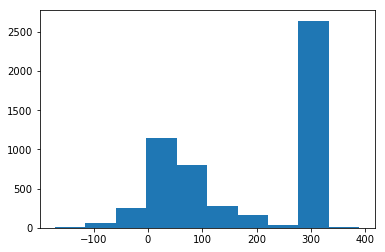

In [143]:
plt.hist(msgopen['xdiff'][np.isfinite(msgopen['xdiff'])])

In [188]:
test = msgopen[msgopen['xdiff']>-5]

In [190]:
test[test['xdiff']>100].size/ test.size

0.6268187180495478

In [157]:
np.sum(np.isfinite(msgopen['xdiff']))

5389

In [166]:
np.sum((msgopen['xdiff'])>0)

5036

In [146]:
isok = np.isfinite(msgopen['initTime'])

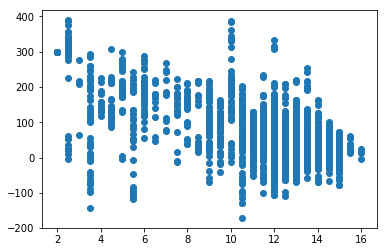

In [147]:
plt.scatter((msgopen['initTime'])[isok], (msgopen['xdiff'])[isok])

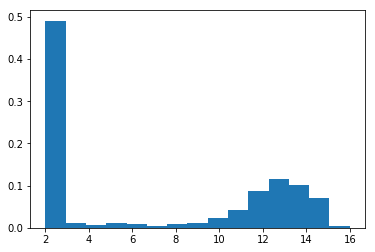

In [148]:
f=plt.figure()
ax = f.add_subplot(111)
out = u_plot.hist_freq(ax,(msgopen['initTime'])[np.isfinite(msgopen['initTime'])], bins=15)

AxesSubplot(0.125,0.125;0.775x0.755)


Text(0.5,0,'Upstream distance of initiation point (km)')

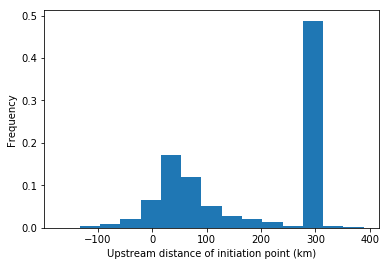

In [149]:
f=plt.figure()
ax = f.add_subplot(111)
out = u_plot.hist_freq(ax,(msgopen['xdiff'])[np.isfinite(msgopen['xdiff'])], bins=15)
print(out)
#ax.set_xticklabels((np.arange(-150,301,50))*3)
#ax.set_xlim(0,305)
ax.set_ylabel('Frequency')
ax.set_xlabel('Upstream distance of initiation point (km)')

In [183]:
freq, count, bins = ustats.histo_frequency(msgopen['xdiff'][msgopen['xdiff']>=0], bins=15)

In [186]:
bins

array([  0.        ,  25.93333333,  51.86666667,  77.8       ,
       103.73333333, 129.66666667, 155.6       , 181.53333333,
       207.46666667, 233.4       , 259.33333333, 285.26666667,
       311.2       , 337.13333333, 363.06666667, 389.        ])

In [187]:
freq

array([0.07466825, 0.14062191, 0.10160428, 0.05525847, 0.03584868,
       0.01921173, 0.01683502, 0.01366607, 0.0120816 , 0.00316894,
       0.00217865, 0.5191127 , 0.00356506, 0.00118835, 0.0009903 ])

In [185]:
np.where(bins<=100)

(array([0, 1, 2, 3]),)

In [179]:
np.sum(freq)

0.9999999999999913

In [180]:
print(np.sum(freq[0:4]))
print(np.sum(freq[4::]))

0.371209057824502
0.6287909421754893


In [181]:
print(np.sum(count[0:4]))
print(np.sum(count[4::]))

1836
3110


In [182]:
print(np.sum(count))

4946


(0, 21)

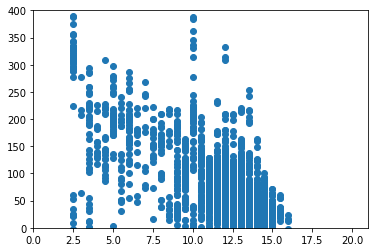

In [66]:
plt.scatter(msgopen['initTime'], msgopen['xdiff'])
plt.ylim(0,400)
plt.xlim(0,21)

ValueError: max must be larger than min in range parameter.

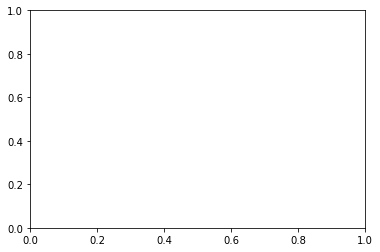

In [67]:
plt.hist((msgopen['xdiff'])[msgopen['initTime']<=2])

In [70]:
((msgopen)[msgopen['initTime']<=2])

,id,id.1,year,month,day,hour,lon,lat,xloc,yloc,...,SMmean0,SMdry0,SMwet0,SMmean-1,SMdry-1,SMwet-1,initTime,xinit,yinit,xdiff
20,20,20,2006,6,2,17,7.157747,10.189110,867,228,...,-2.398284,1.0,0.0,NaN,0.0,0.0,2.0,NaN,NaN,-366.0
82,82,82,2006,6,7,17,-6.137319,11.786687,386,285,...,-4.050306,1.0,0.0,1.308178,0.0,1.0,2.0,NaN,NaN,-464.0
83,83,83,2006,6,7,17,-5.643245,11.919413,403,290,...,-6.142444,1.0,0.0,1.209456,0.0,1.0,2.0,NaN,NaN,-457.0
92,92,92,2006,6,8,17,1.408530,12.890681,658,325,...,NaN,0.0,0.0,-2.348216,1.0,0.0,2.0,NaN,NaN,-399.0
93,93,93,2006,6,8,17,2.800918,14.777851,707,391,...,NaN,0.0,0.0,0.744784,0.0,1.0,2.0,NaN,NaN,-411.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5479,5479,5557,2009,9,2,17,-10.673811,15.693629,232,421,...,-2.900261,1.0,0.0,NaN,0.0,0.0,2.0,NaN,NaN,-495.0
5480,5480,5558,2009,9,2,17,-10.673811,15.737136,232,423,...,-2.807636,1.0,0.0,NaN,0.0,0.0,2.0,NaN,NaN,-503.0
5481,5481,5559,2009,9,3,17,1.139035,10.055594,648,224,...,-0.472899,0.0,0.0,NaN,0.0,0.0,2.0,NaN,NaN,-547.0
5482,5482,5560,2009,9,3,17,-0.972006,12.758453,572,320,...,0.271637,0.0,1.0,NaN,0.0,0.0,2.0,NaN,NaN,-553.0


(array([   0.,    0., 2604.,   21.,    0.,   17.,    3.,    0.,    7.,
          30.,   28.,   95.,  227.,  390.,  431.]),
 array([ 0.        ,  0.93333333,  1.86666667,  2.8       ,  3.73333333,
         4.66666667,  5.6       ,  6.53333333,  7.46666667,  8.4       ,
         9.33333333, 10.26666667, 11.2       , 12.13333333, 13.06666667,
        14.        ]),
 <a list of 15 Patch objects>)

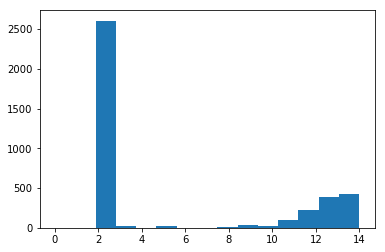

In [69]:
plt.hist((msgopen['initTime'])[msgopen['xdiff']<=60], bins=15, range=(0,14))

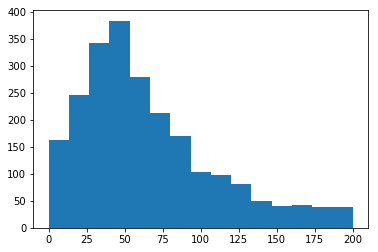

In [39]:
out = plt.hist((msgopen['xdiff'])[np.isfinite(msgopen['xdiff'])], range=(0,200), bins=15)

In [40]:
out[0]

array([163., 247., 342., 384., 280., 212., 170., 104.,  98.,  81.,  50.,
        41.,  43.,  39.,  39.])

In [41]:
np.sum((out[0])[(out[1])[1::]>100])/np.sum(out[0])

0.2158744003488879

In [207]:
msgopen[(np.isfinite(msgopen['SMmean0']))].shape

(5758, 21)

In [203]:
mcsimage = xr.open_dataarray(cnst.MCS_15K)
date = mcsimage[112].time
date

<xarray.DataArray 'time' ()>
array('2006-06-05T16:00:00.000000000', dtype='datetime64[ns]')
Coordinates:
    time     datetime64[ns] 2006-06-05T16:00:00

In [204]:
date=pd.to_datetime(date.values)

In [205]:
date

Timestamp('2006-06-05 16:00:00')

In [189]:
file = cnst.MCS_POINTS_DOM
msg = xr.open_dataarray(file)
msg = msg.sel(time=date, lat=slice(9,19.5), lon=slice(-11.5, 11.5))
mcs_hour = xr.open_dataarray(cnst.MCS_HOUR_DAILY)  ###5km grid
mcsimage = mcsimage.sel(time=date, lat=slice(9,19.5), lon=slice(-11.5, 11.5))
date = date.replace(hour=14)
mhour = mcs_hour.sel(time=date, lat=slice(9,19.5), lon=slice(-11.5, 11.5))

In [190]:
msg

<xarray.DataArray (lat: 240, lon: 512)>
[122880 values with dtype=float64]
Coordinates:
  * lon      (lon) float64 -11.48 -11.44 -11.39 -11.35 ... 11.38 11.42 11.47
  * lat      (lat) float64 9.03 9.075 9.119 9.164 ... 19.36 19.4 19.44 19.48
    time     datetime64[ns] 2006-06-05T16:00:00

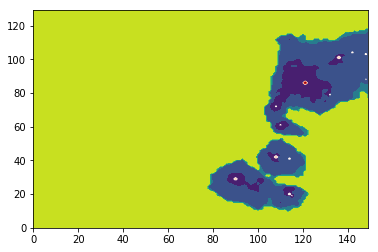

In [191]:
plt.contourf(mcsimage[0:130,90:240])
plt.contour(msg[0:130,90:240], cmap='Reds')

[16. 15. 15. 16. 15. 15. 15. 16. 16. 16. 16. 15. 15. 14. 16. 14. 15. 16.
 15. 15. 16. 14. 14. 14. 16. 16.]


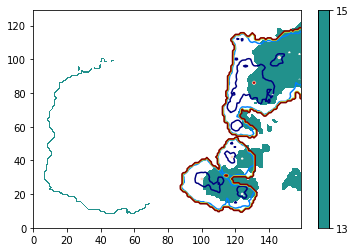

In [197]:
plt.contourf(mhour[0:130,80:240], levels=[13,15])
plt.colorbar()
plt.contour(mcsimage[0:130,80:240], cmap='jet')
plt.contour(msg[0:130,80:240], cmap='Reds')
pos = np.where(msg > 5)
print(mhour.values[pos])

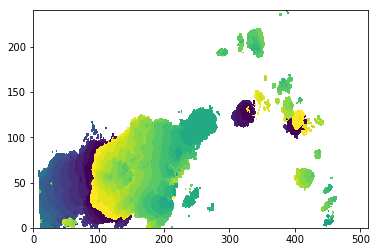

In [170]:
plt.pcolormesh(mhour)

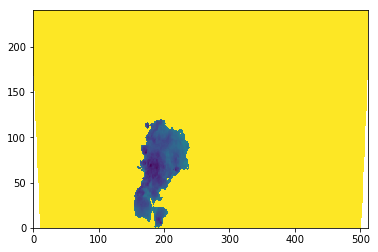

In [171]:
plt.pcolormesh(mcsimage)